In [206]:
library(CausalImpact)

In [207]:
filename <- 'generated/causal/Pylons_pyramid.csv'

TimeSeriesData <- read.csv(file=filename, header=TRUE, sep=",")

summary(TimeSeriesData)

                       ProjectName         Language   ShareReviewComments
 apache/storm                :  45   C++       :315   Min.   :0.00000    
 appcelerator/alloy          :  45   Python    :225   1st Qu.:0.04572    
 appcelerator/titanium_mobile:  45   Java      :180   Median :0.20833    
 astaxie/beego               :  45   JavaScript:135   Mean   :0.25130    
 atom/atom                   :  45   PHP       :135   3rd Qu.:0.40394    
 Automattic/_s               :  45   C         : 90   Max.   :1.00000    
 (Other)                     :1260   (Other)   :450                      
   Additions         Deletions          ChangedFiles       Assignees     
 Min.   :      0   Min.   :      0.0   Min.   :    0.0   Min.   : 0.000  
 1st Qu.:    492   1st Qu.:    132.2   1st Qu.:   27.0   1st Qu.: 0.000  
 Median :   2145   Median :    733.5   Median :   87.5   Median : 0.000  
 Mean   :  36716   Mean   :  14755.5   Mean   :  433.6   Mean   : 2.905  
 3rd Qu.:   8490   3rd Qu.:   4222.8  

In [208]:
append_vars_to_frame <- function(targetFrame, originFrame, projectName, i) {
    
    targetFrame[,paste('Additions', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Additions
    targetFrame[,paste('Deletions', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Deletions
    targetFrame[,paste('ChangedFiles', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$ChangedFiles
    targetFrame[,paste('Assignees', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Assignees
    targetFrame[,paste('TotalPrs', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$TotalPrs
    targetFrame[,paste('Commits', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Commits

    return(targetFrame)
}

In [242]:
dataSubset <- TimeSeriesData[TimeSeriesData$ProjectName=="Pylons/pyramid",
                             c('ShareReviewComments','Additions','Deletions','ChangedFiles', 'Assignees', 'TotalPrs', 'Commits')]

otherProjects = as.vector(unique(TimeSeriesData$ProjectName))

otherProjects <- otherProjects[which(otherProjects!="Pylons/pyramid")]

i <- 1

for(proj in otherProjects) {
    dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, proj, i)
    i = i + 1
}


data <- data.matrix(dataSubset)

head(data)

,ShareReviewComments,Additions,Deletions,ChangedFiles,Assignees,TotalPrs,Commits,Additions1,Deletions1,ChangedFiles1,⋯,ChangedFiles32,Assignees32,TotalPrs32,Commits32,Additions33,Deletions33,ChangedFiles33,Assignees33,TotalPrs33,Commits33
1,0,256,102,14,0,11,16,1992,905,96,⋯,12,0,6,10,3179,1572,94,0,17,80
2,0,3,3,2,0,2,2,5499,4646,245,⋯,15,0,6,23,15310,5324,409,0,24,325
3,0,34,5,5,0,7,13,13921,12480,306,⋯,98,0,14,35,80987,55234,1507,0,27,453
4,0,203,4,11,0,3,8,1874,2103,127,⋯,17,0,8,16,1757,964,60,0,12,27
5,0,8,2,1,0,4,12,2679,655,85,⋯,6,0,6,8,2569,580,130,0,20,58
6,0,0,0,0,0,4,7,2335,392,71,⋯,9,0,7,7,361,33,15,0,8,18


In [243]:
pre.period <- c(1,30)
post.period <- c(31,45)

impact <- CausalImpact(data, pre.period, post.period)

Warning message:
“Removed 45 rows containing missing values (geom_path).”Warning message:
“Removed 90 rows containing missing values (geom_path).”

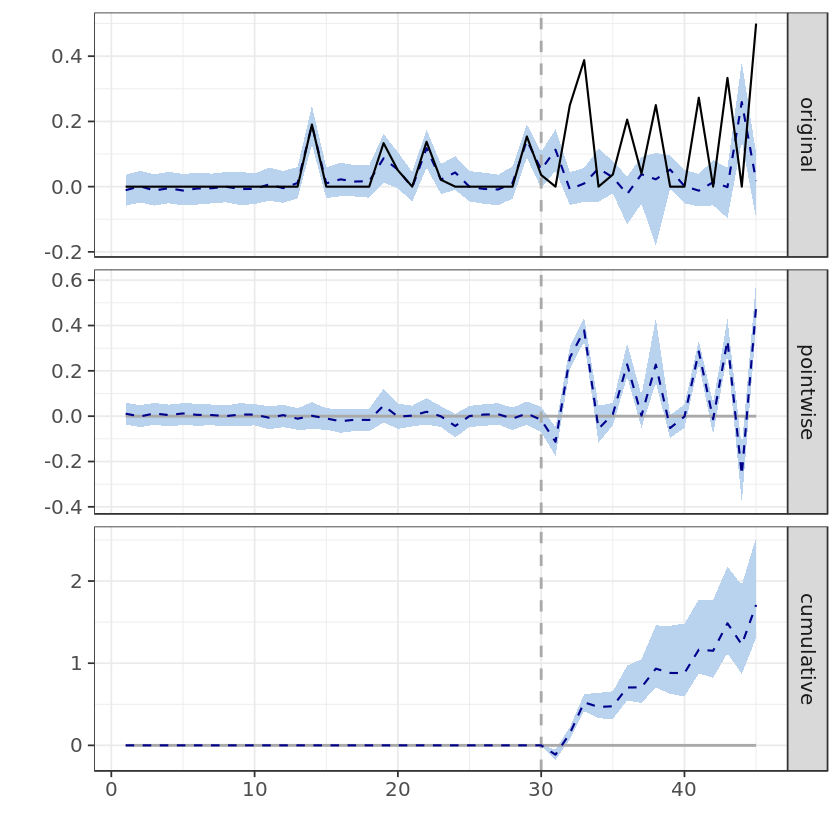

In [244]:
plot(impact)

In [245]:
summary(impact)

Posterior inference {CausalImpact}

                         Average           Cumulative     
Actual                   0.15              2.28           
Prediction (s.d.)        0.038 (0.025)     0.567 (0.369)  
95% CI                   [-0.017, 0.064]   [-0.254, 0.967]
                                                          
Absolute effect (s.d.)   0.11 (0.025)      1.71 (0.369)   
95% CI                   [0.087, 0.17]     [1.310, 2.53]  
                                                          
Relative effect (s.d.)   302% (65%)        302% (65%)     
95% CI                   [231%, 446%]      [231%, 446%]   

Posterior tail-area probability p:   0.00442
Posterior prob. of a causal effect:  99.5585%

For more details, type: summary(impact, "report")



In [241]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 22.13. In the absence of an intervention, we would have expected an average response of 18.70. The 95% interval of this counterfactual prediction is [10.42, 32.34]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 3.43 with a 95% interval of [-10.21, 11.71]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 332.00. Had the intervention not taken place, we would have expected a sum of 280.48. The 95% interval of this prediction is [156.29, 485.10].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +18